In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib
import statistics
%matplotlib inline

In [7]:
class KmeansColorReduction:
    def __init__(self, img, k=5, seed=1):
        assert len(img.shape) == 3, "img dimension is not 3."
        self.img = img
        self.num_classes = k
        self.H, self.W, self.C = img.shape
        self.leaders = self.decide_leaders()
        self.classes = self.init_classes()
        np.random.seed(seed)
    
    def decide_leaders(self):
        leaders = np.zeros((self.num_classes, self.C), dtype=np.float32)
        for k in range(self.num_classes):
            h = np.random.randint(0, self.H)
            w = np.random.randint(0, self.W)
            leaders[k] = self.img[h, w]
        return leaders
    
    def init_classes(self):
        classes = np.random.randint(self.num_classes, size=(self.H, self.W))
        return classes.astype(np.int)
    
    def next_state(self):
        ns = [0 for i in range(self.num_classes)]
        gs = np.zeros((self.num_classes, 3), dtype=np.float32)
        classes = np.zeros((self.H, self.W))
        for i in range(self.H):
            for j in range(self.W):
                cls = np.argmin([np.linalg.norm(self.img[i, j] - self.leaders[c]) for c in range(self.num_classes)])
                classes[i, j] = cls
                ns[cls] += 1
                gs[cls] += self.img[i, j]
        for i in range(self.num_classes):
            gs[i] /= ns[i]
        classes = classes.astype(np.int)
        return gs, classes, np.any(self.classes != classes)
    
    def reduction(self, max_iter=-1):
        iteration = 0
        while max_iter == -1 or iteration < max_iter:
            iteration += 1
            self.leaders, self.classes, cont = self.next_state()
            if not cont:
                break

In [15]:
class Solver:
    def problem_91(self, img, k=5, seed=0):
        self.kmeans = KmeansColorReduction(img, k, seed)
        self.kmeans.reduction(max_iter=1)
        result_img = self.kmeans.classes * 50
        plt.imshow(result_img, cmap="gray")
        plt.show()
        
    def problem_92(self, img1, img2, k1=10, k2=5, seed=0):
        self.kmeans_imori = KmeansColorReduction(img1, k1, seed)
        self.kmeans_imori.reduction()
        result_img1 = self.kmeans_imori.leaders[self.kmeans_imori.classes]
        result_img1 = np.clip(result_img1, 0, 255).astype(np.uint8)
        plt.imshow(cv2.cvtColor(result_img1, cv2.COLOR_BGR2RGB))
        plt.show()
        
        self.kmeans_madara = KmeansColorReduction(img2, k2, seed)
        self.kmeans_madara.reduction()
        result_img2 = self.kmeans_madara.leaders[self.kmeans_madara.classes]
        result_img2 = np.clip(result_img2, 0, 255).astype(np.uint8)
        plt.imshow(cv2.cvtColor(result_img2, cv2.COLOR_BGR2RGB))
        plt.show()

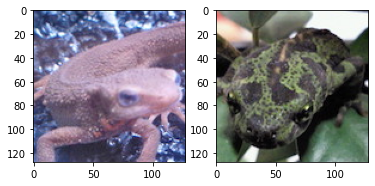

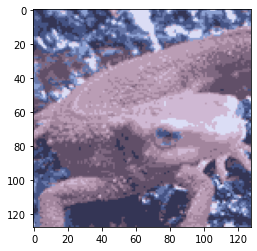

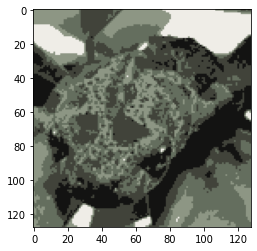

In [16]:
img_imori = cv2.imread("../imori.jpg")
img_madara = cv2.imread("../madara.jpg")

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_imori, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_madara, cv2.COLOR_BGR2RGB))
plt.show()

solver = Solver()
solver.problem_92(img_imori, img_madara, k1=10, k2=5, seed=0)